In [1]:
import torch
from vae import VAE
from train import train_vae

from torch.utils.data import DataLoader, TensorDataset
from jacobian import compute_jacobian
from visualize import visualize_jacobian_at_z0, visualize_jacobian_plane_at_z0, visualize_jacobian_plane_at_z0_schmidt

In [2]:
import numpy as np

# Number of data points
num_points = 10000

# Radius of hemisphere
radius = 1.0

# Randomly sample theta and phi angles
theta = np.random.uniform(0, np.pi/2, num_points)
phi = np.random.uniform(0, 2*np.pi, num_points)

# Convert the sampled angles to Cartesian coordinates
x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# Stack the coordinates together to get the data
hemisphere_data = np.vstack((x, y, z)).T

hemisphere_data.shape
# Convert the numpy array to a PyTorch tensor
hemisphere_tensor = torch.from_numpy(hemisphere_data).float()

# Wrap the tensor in a TensorDataset and DataLoader
hemisphere_dataset = TensorDataset(hemisphere_tensor)
hemisphere_dataloader = DataLoader(hemisphere_dataset, batch_size=1024, shuffle=True)

hemisphere_tensor.shape


torch.Size([10000, 3])

In [5]:

# Initialize the VAE with input_dim=5 and latent_dim=2
vae = VAE(input_dim=3, latent_dim=2, hidden_dim=64, activation="leaky_relu")

# Train the VAE
train_vae(vae, hemisphere_dataloader, epochs=100, learning_rate=1e-2, beta=0.2)

Epoch 1/100, Loss: 0.7532138916015625
Epoch 2/100, Loss: 0.5988537567138672
Epoch 3/100, Loss: 0.5489103271484375
Epoch 4/100, Loss: 0.5304224609375
Epoch 5/100, Loss: 0.5197523498535156
Epoch 6/100, Loss: 0.5118739166259766
Epoch 7/100, Loss: 0.5059874481201172
Epoch 8/100, Loss: 0.5036119415283203
Epoch 9/100, Loss: 0.5002943786621094
Epoch 10/100, Loss: 0.4936385070800781
Epoch 11/100, Loss: 0.49413605041503905
Epoch 12/100, Loss: 0.49143788146972656
Epoch 13/100, Loss: 0.49050269775390626
Epoch 14/100, Loss: 0.4887440673828125
Epoch 15/100, Loss: 0.4859321533203125
Epoch 16/100, Loss: 0.48183653564453127
Epoch 17/100, Loss: 0.48362489624023436
Epoch 18/100, Loss: 0.46911504821777344
Epoch 19/100, Loss: 0.4591333465576172
Epoch 20/100, Loss: 0.45431557312011717
Epoch 21/100, Loss: 0.449934521484375
Epoch 22/100, Loss: 0.44871229248046873
Epoch 23/100, Loss: 0.45247797241210935
Epoch 24/100, Loss: 0.4497208190917969
Epoch 25/100, Loss: 0.44590286865234374
Epoch 26/100, Loss: 0.443828

In [6]:
# Pass the hemisphere data through the VAE to get the reconstructed data
with torch.no_grad():
    reconstructed, mu, logvar = vae(hemisphere_tensor)
    reconstr_mean = vae.decoder(mu)

# Convert the reconstructed data to numpy for visualization
reconstructed_data = reconstructed.numpy()
latent_mu = mu
latent_mu_data = mu.numpy()
latent_logvar = logvar.numpy()
reconstr_mean = reconstr_mean.numpy()
reconstructed_data.shape


(10000, 3)

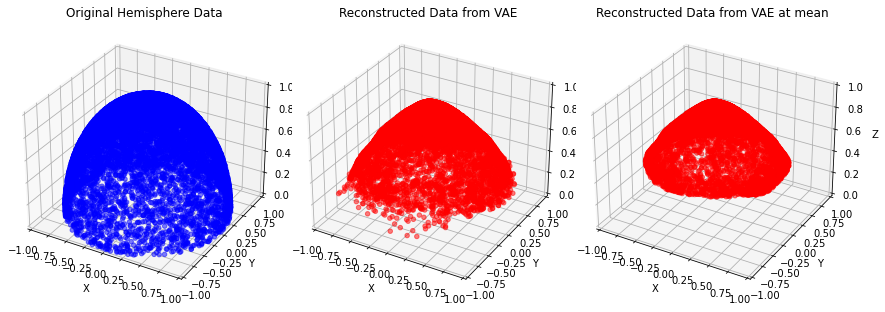

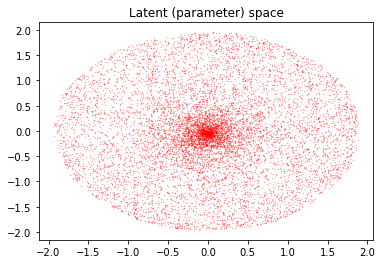

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

# Plot original data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.5)
ax1.set_title("Original Hemisphere Data")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(133, projection='3d')
ax2.scatter(reconstr_mean[:, 0], reconstr_mean[:, 1], reconstr_mean[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE at mean")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

plt.tight_layout()
plt.show()

plt.scatter(latent_mu_data[:,0], latent_mu_data[:,1], c='r', marker='o', alpha=0.5, s=0.1)
plt.title("Latent (parameter) space")
plt.show()

In [8]:
jac = compute_jacobian(vae, latent_mu)

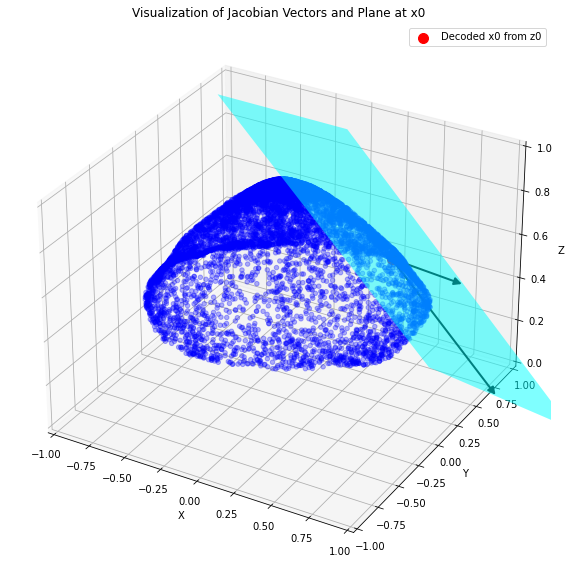

In [11]:
z0 = torch.randn(2).float().unsqueeze(0)
visualize_jacobian_plane_at_z0_schmidt(vae, z0, reconstr_mean)

In [ ]:
# Orthogonalize the Jacobian tensor using QR decomposition
Q, _ = torch.qr(jac.transpose(1, 2))
orthonormal_basis = Q.transpose(1, 2)


In [ ]:
# Orthogonalize the Jacobian tensor using QR decomposition
Q, _ = torch.qr(jac.transpose(1, 2))
orthonormal_basis = Q.transpose(1, 2)


In [ ]:
orthonormal_basis

tensor([[[-0.4320,  0.9019],
         [ 0.9019,  0.4320]],

        [[-0.6224,  0.7827],
         [ 0.7827,  0.6224]],

        [[-0.6919,  0.7220],
         [ 0.7220,  0.6919]],

        ...,

        [[-0.5276,  0.8495],
         [ 0.8495,  0.5276]],

        [[-0.7124,  0.7018],
         [ 0.7018,  0.7124]],

        [[-0.3928,  0.9196],
         [ 0.9196,  0.3928]]], grad_fn=<TransposeBackward0>)

In [ ]:
# Compute the metric tensor g_ij using the orthonormal basis
metric_tensor = torch.einsum('bik,bjk->bij', orthonormal_basis, orthonormal_basis)


In [ ]:
# Reshape the metric_tensor to treat each slice as a separate item in the batch dimension
latent_dim = latent_mu.size(1)
reshaped_metric_tensor = metric_tensor.view(-1, latent_dim)

# Compute the gradient for the entire reshaped tensor
metric_derivatives_reshaped = torch.autograd.grad(reshaped_metric_tensor.sum(), latent_mu, 
                                                 retain_graph=True, create_graph=True)[0]

# Reshape the metric_derivatives back to the original shape
metric_derivatives = metric_derivatives_reshaped.view(-1, latent_dim, latent_dim)


In [ ]:
jac.shape

torch.Size([10000, 3, 2])

In [ ]:
orthonormal_basis.shape

torch.Size([10000, 2, 2])

In [ ]:
from jacobian import gram_schmidt_batched

In [ ]:
def gram_schmidt_batched(A):
    """
    Perform the Gram-Schmidt process on a batch of matrices.
    :param A: Batched tensor of shape (n_batch, m, n).
    :return: Orthonormalized batched tensor.
    """
    n_batch, m, n = A.shape
    Q = torch.zeros_like(A)
    
    for j in range(n):
        # Start with the original vector
        v_original = A[:, :, j]        
        v = v_original.clone()  # Create a copy to avoid in-place modification
        
        # Orthogonalize v w.r.t. the previous vectors in Q
        for k in range(j):
            # v = v - (torch.sum(v * Q[:, :, k], dim=1, keepdim=True) * Q[:, :, k])
            v_new = v - (torch.sum(v * Q[:, :, k], dim=1, keepdim=True) * Q[:, :, k])
            v = v_new

        
        # Normalize v
        v = v / torch.linalg.norm(v, dim=1, keepdim=True)
        
        # Store in Q
        Q[:, :, j] = v

    return Q

In [ ]:
Q, R = torch.qr(jac)

In [ ]:
Q.shape

torch.Size([10000, 3, 2])

In [ ]:
torch.autograd.set_detect_anomaly(True)

Q2 = gram_schmidt_batched(jac)

In [ ]:
Q2.shape

torch.Size([10000, 3, 2])

In [ ]:
# Compute the metric tensor g_ij using the orthonormal basis
metric_tensor = torch.einsum('bik,bjk->bij', Q, Q)


In [ ]:
# Reshape the metric_tensor to treat each slice as a separate item in the batch dimension
latent_dim = latent_mu.size(1)
reshaped_metric_tensor = metric_tensor.view(-1, latent_dim)

# Compute the gradient for the entire reshaped tensor
metric_derivatives_reshaped = torch.autograd.grad(reshaped_metric_tensor.sum(), latent_mu, 
                                                 retain_graph=True, create_graph=True)[0]

# Reshape the metric_derivatives back to the original shape
metric_derivatives = metric_derivatives_reshaped.view(-1, latent_dim, latent_dim)


In [ ]:
reshaped_metric_tensor.sum()

tensor(20422.8828, grad_fn=<SumBackward0>)

In [ ]:
metric_tensor.size()

torch.Size([10000, 3, 3])

In [ ]:
metric_tensor

tensor([[[ 7.7367e-01,  1.2515e-01,  3.9930e-01],
         [ 1.2515e-01,  9.3079e-01, -2.2080e-01],
         [ 3.9930e-01, -2.2080e-01,  2.9553e-01]],

        [[ 9.3583e-01, -4.0818e-02, -2.4163e-01],
         [-4.0818e-02,  9.7404e-01, -1.5370e-01],
         [-2.4163e-01, -1.5370e-01,  9.0132e-02]],

        [[ 9.9135e-01, -4.8971e-02, -7.8609e-02],
         [-4.8971e-02,  7.2283e-01, -4.4491e-01],
         [-7.8609e-02, -4.4491e-01,  2.8582e-01]],

        ...,

        [[ 9.9856e-01, -8.6612e-04, -3.7901e-02],
         [-8.6612e-04,  9.9948e-01, -2.2804e-02],
         [-3.7901e-02, -2.2804e-02,  1.9604e-03]],

        [[ 6.1169e-01,  2.9775e-01, -3.8584e-01],
         [ 2.9775e-01,  7.7169e-01,  2.9585e-01],
         [-3.8584e-01,  2.9585e-01,  6.1662e-01]],

        [[ 8.5669e-01,  1.2685e-01,  3.2662e-01],
         [ 1.2685e-01,  8.8772e-01, -2.8911e-01],
         [ 3.2662e-01, -2.8911e-01,  2.5559e-01]]], grad_fn=<ViewBackward>)

In [ ]:
metric_derivatives

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], grad_fn=<ViewBackward>)

In [ ]:
ders = torch.autograd.grad(jac[0:1, ...].sum(), latent_mu[0:1, ...], retain_graph=True, create_graph=True)[0]

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [ ]:
ders.shape

torch.Size([10000, 2])

In [ ]:
latent_mu[0:1, ...].shape

torch.Size([1, 2])

In [ ]:
jac[0:1, ...]

tensor([[[-0.2370,  0.4947],
         [-0.3447, -0.3260],
         [-0.0263,  0.3826]]], grad_fn=<SliceBackward>)

In [ ]:
latent_mu.requires_grad_(True)
vae.no_grad()
output = vae.decoder(latent_mu)
batch_size, output_dim, latent_dim = *output.shape, latent_mu.shape[-1]

# Use autograd's grad function to get gradients for each output dimension
jac2 = torch.zeros(batch_size, output_dim, latent_dim).to(latent_mu.device)
for i in range(output_dim):
    grad_outputs = torch.zeros(batch_size, output_dim).to(latent_mu.device)
    grad_outputs[:, i] = 1.0
    gradients = torch.autograd.grad(outputs=output, inputs=latent_mu, grad_outputs=grad_outputs, create_graph=True, retain_graph=True, only_inputs=True)[0]
    jac2[:, i, :] = gradients


In [ ]:
grad_outputs = torch.zeros(batch_size, output_dim).to(latent_mu.device)
grad_outputs[:, i] = 1.0
gradients = torch.autograd.grad(outputs=output, inputs=latent_mu, grad_outputs=grad_outputs, create_graph=True, retain_graph=True, only_inputs=True)[0]

In [ ]:
ders = torch.autograd.grad(gradients[0,0], latent_mu[0:1, ...], retain_graph=True, create_graph=True)[0]

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [ ]:
gradients[0,0]

tensor(-0.0263, grad_fn=<SelectBackward>)

In [ ]:
from torchviz import make_dot


In [ ]:

dot = make_dot(jac)
dot.view()

'Digraph.gv.pdf'

In [12]:
latent_mu_small = latent_mu[0:1, ...].detach().clone()
latent_mu_small.requires_grad_(True)
for param in vae.parameters():
    param.requires_grad = False
output = vae.decoder(latent_mu_small)
batch_size, output_dim, latent_dim = *output.shape, latent_mu_small.shape[-1]
grad_outputs = torch.ones(batch_size, output_dim).to(latent_mu_small.device)
gradients = torch.autograd.grad(outputs=output, inputs=latent_mu_small, grad_outputs=grad_outputs, create_graph=True, retain_graph=True, only_inputs=True)[0]
ders_output = torch.ones(batch_size, 2).to(latent_mu_small.device)
ders = torch.autograd.grad(outputs = gradients, inputs = latent_mu_small, grad_outputs=ders_output, retain_graph=True, create_graph=True, only_inputs=True)[0]

In [13]:
gradients

tensor([[1.1272, 0.1658]], grad_fn=<MmBackward>)

In [14]:
ders

tensor([[0., 0.]], grad_fn=<MmBackward>)

In [15]:

dot = make_dot(gradients)
dot.view()

NameError: name 'make_dot' is not defined

In [16]:

dot = make_dot(ders)
dot.view()

NameError: name 'make_dot' is not defined

In [17]:
# 1. Compute the gradient of output with respect to latent_mu_small
gradients = torch.autograd.grad(outputs=output.sum(), inputs=latent_mu_small, create_graph=True)[0]

# 2. Initialize the Hessian
hessian = torch.zeros(latent_dim, latent_dim)

# 3. For each element in gradients, compute its gradient with respect to latent_mu_small
for i in range(latent_dim):
    grad2 = torch.autograd.grad(outputs=gradients[0, i], inputs=latent_mu_small, grad_outputs=torch.tensor(1.0).to(latent_mu_small.device), create_graph=True)[0]
    hessian[i] = grad2


In [18]:
hessian

tensor([[0., 0.],
        [0., 0.]], grad_fn=<CopySlices>)

In [19]:
gradients

tensor([[1.1272, 0.1658]], grad_fn=<MmBackward>)

In [20]:
vae

VAE(
  (activation): LeakyReLU(negative_slope=0.01)
  (encoder): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [53]:
latent_mu_smalls = latent_mu[0:10, ...].detach().clone().requires_grad_(True)
output = vae.decoder(latent_mu_smalls)
# output = latent_mu_smalls.square().sum(dim=1)
# 1. Compute the gradient of output with respect to latent_mu_small
latent_dim = latent_mu_smalls.shape[1]
batch_size = latent_mu_smalls.shape[0]

# 1. Compute the gradient of output with respect to latent_mu_smalls
gradients = torch.autograd.grad(outputs=output.sum(), inputs=latent_mu_smalls, create_graph=True)[0]

# 2. Initialize the Hessian
hessian = torch.zeros(batch_size, latent_dim, latent_dim).to(latent_mu_smalls.device)

# 3. For each element in gradients, compute its gradient with respect to latent_mu_smalls
for i in range(latent_dim):
    grad2 = torch.autograd.grad(outputs=gradients[:, i], inputs=latent_mu_smalls, grad_outputs=torch.ones_like(gradients[:, i]), create_graph=True)[0]
    hessian[:, i] = grad2

print(gradients)
print(hessian)


tensor([[1.1272, 0.1658],
        [0.4281, 0.6244],
        [0.4018, 0.5887],
        [0.3739, 0.1624],
        [0.7366, 0.4841],
        [0.6444, 0.5280],
        [0.4312, 0.1841],
        [0.4881, 0.1083],
        [0.6505, 0.2062],
        [0.6085, 0.7247]], grad_fn=<MmBackward>)
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], grad_fn=<CopySlices>)


In [51]:
lms = latent_mu_smalls.detach().squeeze().numpy()

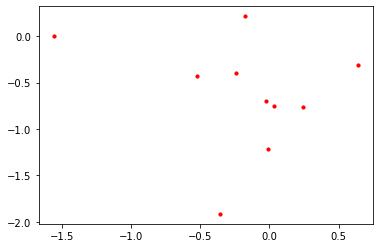

In [39]:
plt.scatter(lms[:,0], lms[:,1], c='r', marker='o', alpha=1, s=10)

In [49]:
vae

VAE(
  (activation): LeakyReLU(negative_slope=0.01)
  (encoder): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)